In [17]:
import os
import csv
import json
import math
import torch
import argparse
import difflib
import logging
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt

In [21]:
ORIGINAL_PATH = 'data/crows_pairs_anonymized.csv'
lambda_list = [0.2,0.4,0.6,0.8,1.0]

In [19]:
for lambda_ in lambda_list:
    input_file = ORIGINAL_PATH
    lm_model = "bert"
    output_file = "crows_pairs_lambda_{}.csv".format(lambda_)
    !python metric_withmodified.py --input_file {input_file} --lm_model {lm_model}  --output_file {output_file} --lamb {lambda_}

Evaluating:
Input: data/crows_pairs_anonymized.csv
Model: bert
Calculating for lambda_:  0.2
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|█████████████████████████████████████████████| 4/4 [00:38<00:00,  9.52s/it]
Total examples: 4
Metric score: 50.0
Stereotype score: 33.33
Anti-stereotype score: 100.0
Num. neutral: 0 0.0

Metrics stored in :  data/lambda_0.2.txt
Evaluating:
Input: data/crows_pairs_anony

In [57]:
# Generation of box plots
exp_name = "bert"
data_stereo, data_anti = [],[]
x_labels = []
for lambda_ in lambda_list:
    text_file = "data/{}_{}.txt".format(exp_name,lambda_)
    try: 
        with open(text_file) as f:
             lines = f.readlines() # format of lines: metric score, stereo , anti stereo, neutral
        stereo_scores = [float(line.split()[1]) for line in lines] # plotting for stereo scores
        anti_stereoscores = [float(line.split()[2]) for line in lines] # plotting for antistereo scores
        data_stereo.extend(stereo_scores)
        data_anti.extend(anti_stereoscores)
        x_labels.append(lambda_)
    except Exception as error:
        print("Error for file {}, {}".format(text_file,error))
        continue

Error for file data/bert_0.2.txt, [Errno 2] No such file or directory: 'data/bert_0.2.txt'
Error for file data/bert_0.4.txt, [Errno 2] No such file or directory: 'data/bert_0.4.txt'
Error for file data/bert_0.6.txt, [Errno 2] No such file or directory: 'data/bert_0.6.txt'
Error for file data/bert_0.8.txt, [Errno 2] No such file or directory: 'data/bert_0.8.txt'
Error for file data/bert_1.0.txt, [Errno 2] No such file or directory: 'data/bert_1.0.txt'


In [39]:
# fig, ax = plt.subplots()
# ax.boxplot(data)
# ax.set_xticklabels(x_labels)
# ax.set_xlabel("No of Splits")
# ax.set_xlabel("Stereo Type Score")
# plt.show()

In [40]:
len(data_stereo)

5

In [41]:
len(lambda_list)

5

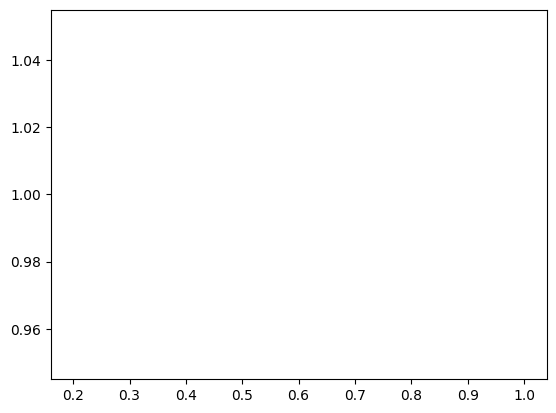

In [42]:
for i, stereo in enumerate(data_stereo):
    
    plt.plot(lambda_list[i], stereo, linestyle='solid')

plt.show()

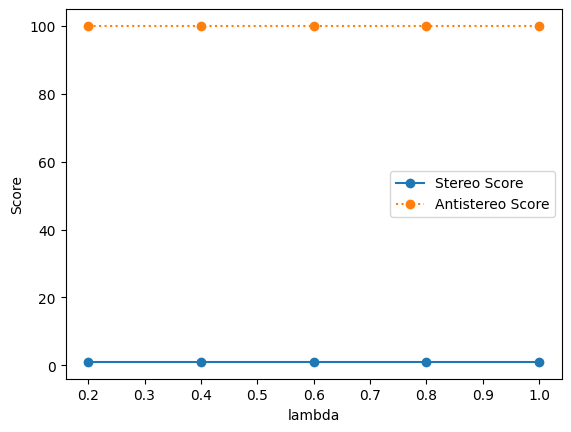

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(lambda_list, data_stereo, linestyle='solid',label='Stereo Score',marker="o")
ax.plot(lambda_list, data_anti, linestyle='dotted',label='Antistereo Score',marker="o")
ax.set_xlabel('lambda')
ax.set_ylabel('Score')
ax.legend()
plt.show()